In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

In [2]:
r2_dir = "C:/Users/tneth/OneDrive/Documents/MSc_AppBio/MSc_project/outputs/specieslm/r2/"

def extract_species_name(filename):
    base = os.path.basename(filename).replace(".csv", "")
    parts = base.split('_')
    if len(parts) > 4:
        raise ValueError(f"Unexpected filename format: {base}")
    return "_".join(parts[-2:]).lower()
    


In [ ]:
### --- UPSTREAM --- ###

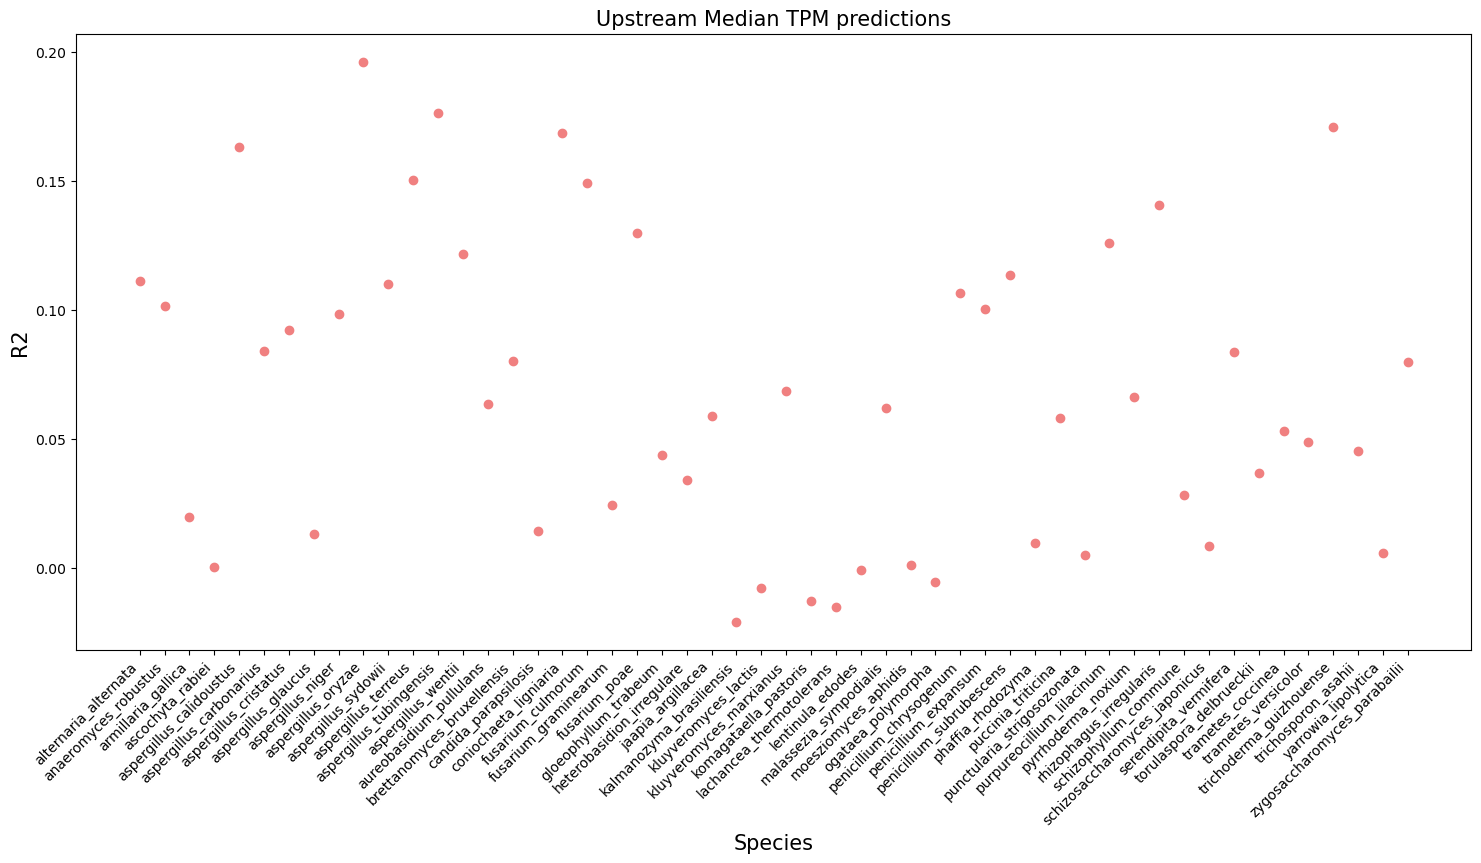

In [7]:
## Import data ##

five_r2 = []

for filename in os.listdir(r2_dir):
    if filename.startswith("upstream"):
        file_path = os.path.join(r2_dir, filename)
        species_name = extract_species_name(filename)
        df = pd.read_csv(file_path)
        df["species"] = species_name
        five_r2.append(df)

up_combined_df = pd.concat(five_r2, ignore_index=True)

#up_combined_df.to_csv("C:/Users/tneth/OneDrive/Documents/MSc_AppBio/MSc_project/outputs/specieslm/r2/combined_upstream.csv", index=False)

## Plot data ##
X = np.arange(len(up_combined_df)) 
y = np.array(up_combined_df["R2"])
species = up_combined_df["species"].tolist() 

#print(up_combined_df)
a, b = np.polyfit(X, y, 1)

plt.figure(figsize=(18,8))
plt.scatter(X, y, color="lightcoral")
#plt.plot(X, a*X + b, color="brown", linestyle="-")


plt.title("Upstream_r2_values", fontsize=15)
plt.xlabel("Species", fontsize=15)
plt.title("Upstream Median TPM predictions", fontsize=15)
plt.xticks(ticks=X, labels=species, rotation=45, ha="right", fontsize=10)
plt.ylabel("R2", fontsize=15)



plt.show()

In [ ]:
### --- DOWNSTREAM --- ###

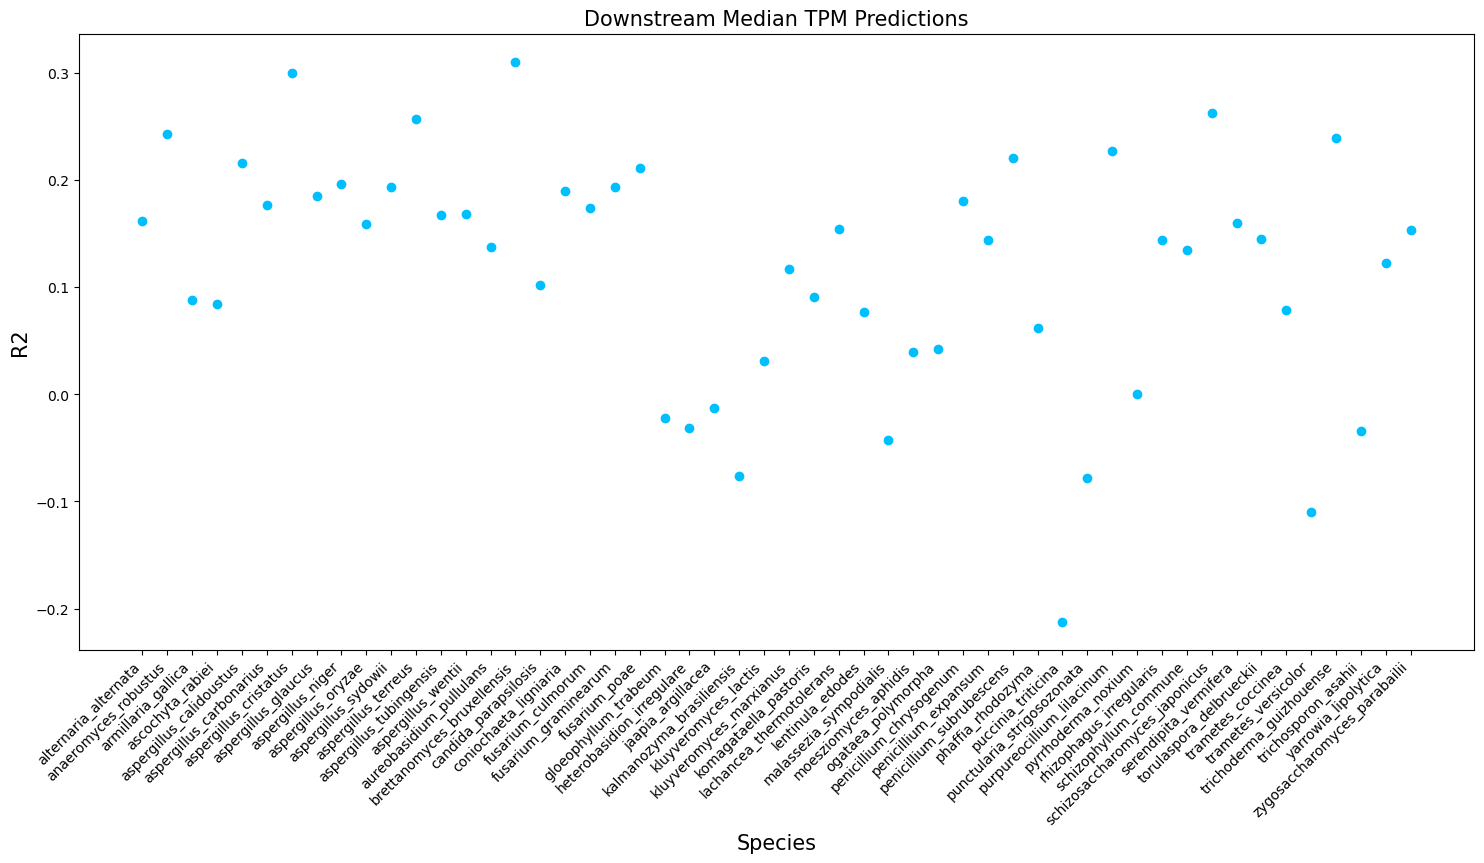

In [9]:
three_r2 = []

for filename in os.listdir(r2_dir):
    if filename.startswith("downstream"):
        file_path = os.path.join(r2_dir, filename)
        species_name = extract_species_name(filename)
        df = pd.read_csv(file_path)
        df["species"] = species_name
        three_r2.append(df)

combined_df = pd.concat(three_r2, ignore_index=True)


#print(combined_df)
#combined_df.to_csv("C:/Users/tneth/OneDrive/Documents/MSc_AppBio/MSc_project/outputs/specieslm/r2/combined_downstream.csv", index=False)

X = np.arange(len(combined_df)) 

y = np.array(combined_df["R2"])
species = combined_df["species"].tolist() 


a, b = np.polyfit(X, y, 1)

plt.figure(figsize=(18,8))
plt.scatter(X, y, color="deepskyblue")
plt.title("Downstream_r2_values", fontsize=15)
plt.xlabel("Species", fontsize=15)
plt.title("Downstream Median TPM Predictions", fontsize=15)
plt.xticks(ticks=X, labels=species, rotation=45, ha="right", fontsize=10)
plt.ylabel("R2", fontsize=15, rotation=90)
plt.show()